In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import sklearn
sklearn.__version__


'1.1.1'

In [2]:
fraud=pd.read_csv(r"C:\Users\Shivam\Downloads\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud['Undergrad']=fraud['Undergrad'].astype('category')
fraud['Marital.Status']=fraud['Marital.Status'].astype('category')
fraud['Urban']=fraud['Urban'].astype('category')

fraud.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income        int64
City.Population       int64
Work.Experience       int64
Urban              category
dtype: object

In [7]:
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])

In [8]:
label_encoder=preprocessing.LabelEncoder()
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])

In [9]:
label_encoder=preprocessing.LabelEncoder()
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [10]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [11]:
fraud['Taxable.Income']=fraud['Taxable.Income'].map(lambda x:'risky' if x<30000 else 'good')

In [12]:
label_encoder=preprocessing.LabelEncoder()
fraud['Taxable.Income']=label_encoder.fit_transform(fraud['Taxable.Income'])

In [13]:
X =fraud.drop("Taxable.Income",axis=1)  
y=fraud['Taxable.Income']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [16]:
rf_model =  RandomForestClassifier( n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_train_pred = rf_model.predict(X_train)

In [18]:
y_test_pred = rf_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [20]:
accuracy_score(y_train,y_train_pred)

1.0

In [21]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

In [22]:
precision_score(y_train,y_train_pred)

1.0

In [23]:
recall_score(y_train,y_train_pred)

1.0

In [24]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



1.0


Text(0, 0.5, 'True Positive Rate')

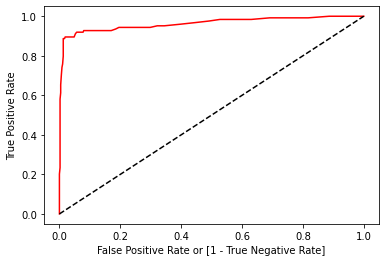

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [26]:
accuracy_score(y_test,y_test_pred)

0.7916666666666666

In [27]:
confusion_matrix(y_test,y_test_pred)

array([[95, 12],
       [13,  0]], dtype=int64)

In [28]:
precision_score(y_test,y_test_pred)

0.0

In [29]:
recall_score(y_test,y_test_pred)


0.0